In [1]:
import pandas as pd 
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

## Load and check the dataset

In [2]:
book = pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## EDA

In [3]:
book.shape

(2000, 11)

In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
for i in range(len(book.columns)):
    print(f"{book.columns[i]} : {book[book.columns[i]].value_counts()[1]}")

ChildBks : 846
YouthBks : 495
CookBks : 862
DoItYBks : 564
RefBks : 429
ArtBks : 482
GeogBks : 552
ItalCook : 227
ItalAtlas : 74
ItalArt : 97
Florence : 217


## Apriori Algorithm

### Creating itemsets with:
#### min_supports = [0.01,0.03,0.05] 
#### min_threshold = [0.5,0.8,0.9]
#### metric = "lift"  (lift > 1)     : diff. metric --> "support", "confidence", "lift", "leverage", and "conviction"   
### the support value is used to identify frequent itemsets in the dataset
###  confidence value is used to measure the strength of association between the items in the rules generated from these itemsets

In [6]:
min_supports = [0.01,0.03,0.05,0.1]
min_thresholds = [0.5,0.8,0.9]
for i in range(len(min_supports)):
    frequent_itemsets = apriori(book, min_support=min_supports[i], use_colnames=True)
    for j in range(len(min_thresholds)):
        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_thresholds[j]) 
        print(f"{[min_supports[i],min_thresholds[j]]} : {rules[rules.lift>1].shape[0]} rules")

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


[0.01, 0.5] : 11102 rules
[0.01, 0.8] : 11102 rules
[0.01, 0.9] : 11102 rules
[0.03, 0.5] : 1676 rules
[0.03, 0.8] : 1676 rules
[0.03, 0.9] : 1676 rules


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


[0.05, 0.5] : 662 rules
[0.05, 0.8] : 662 rules
[0.05, 0.9] : 662 rules
[0.1, 0.5] : 100 rules
[0.1, 0.8] : 100 rules
[0.1, 0.9] : 100 rules


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


### By increasing the support and confidence value the number of rules will decrease.

### see some of the rules
### rules with lift > 1, min_support = 0.1 and min_threshold = 0.8

In [7]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [8]:
itemsets = apriori(book, min_support=0.1, use_colnames=True) # min_support is support
rules = association_rules(itemsets, metric="lift", min_threshold=0.8) # min_threshold is confidence
rules.sort_values('lift', ascending=False)[0:5]

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966


## Visualization

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

### Scatter Plot

Text(0.5, 1.0, 'Association Rules')

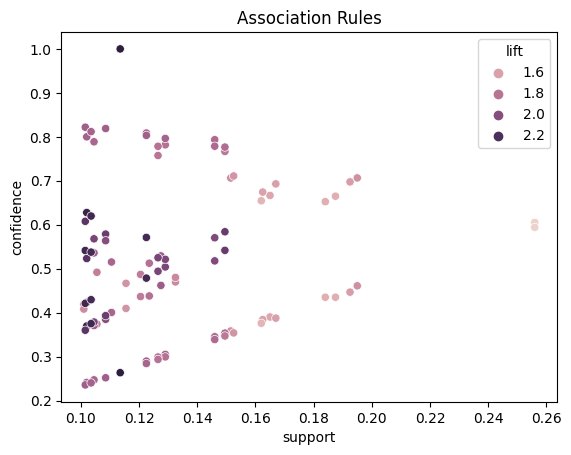

In [10]:
sns.scatterplot(data=rules, x='support', y='confidence', hue='lift')
plt.title('Association Rules')

### Heatmap

In [12]:
itemsets.shape

(39, 2)

In [13]:
itemsets_df = itemsets
itemsets_df = itemsets_df.sort_values('support', ascending=False)[0:20]
itemsets_df = itemsets_df.set_index('itemsets').T
itemsets_df

itemsets,(CookBks),(ChildBks),(DoItYBks),(GeogBks),"(ChildBks, CookBks)",(YouthBks),(ArtBks),(RefBks),"(ChildBks, GeogBks)","(GeogBks, CookBks)","(DoItYBks, CookBks)","(DoItYBks, ChildBks)","(ArtBks, CookBks)","(YouthBks, ChildBks)","(ArtBks, ChildBks)","(YouthBks, CookBks)","(CookBks, RefBks)","(ChildBks, RefBks)","(GeogBks, ChildBks, CookBks)","(DoItYBks, ChildBks, CookBks)"
support,0.431,0.423,0.282,0.276,0.256,0.2475,0.241,0.2145,0.195,0.1925,0.1875,0.184,0.167,0.165,0.1625,0.162,0.1525,0.1515,0.1495,0.146


Text(0.5, 1.0, 'Itemsets')

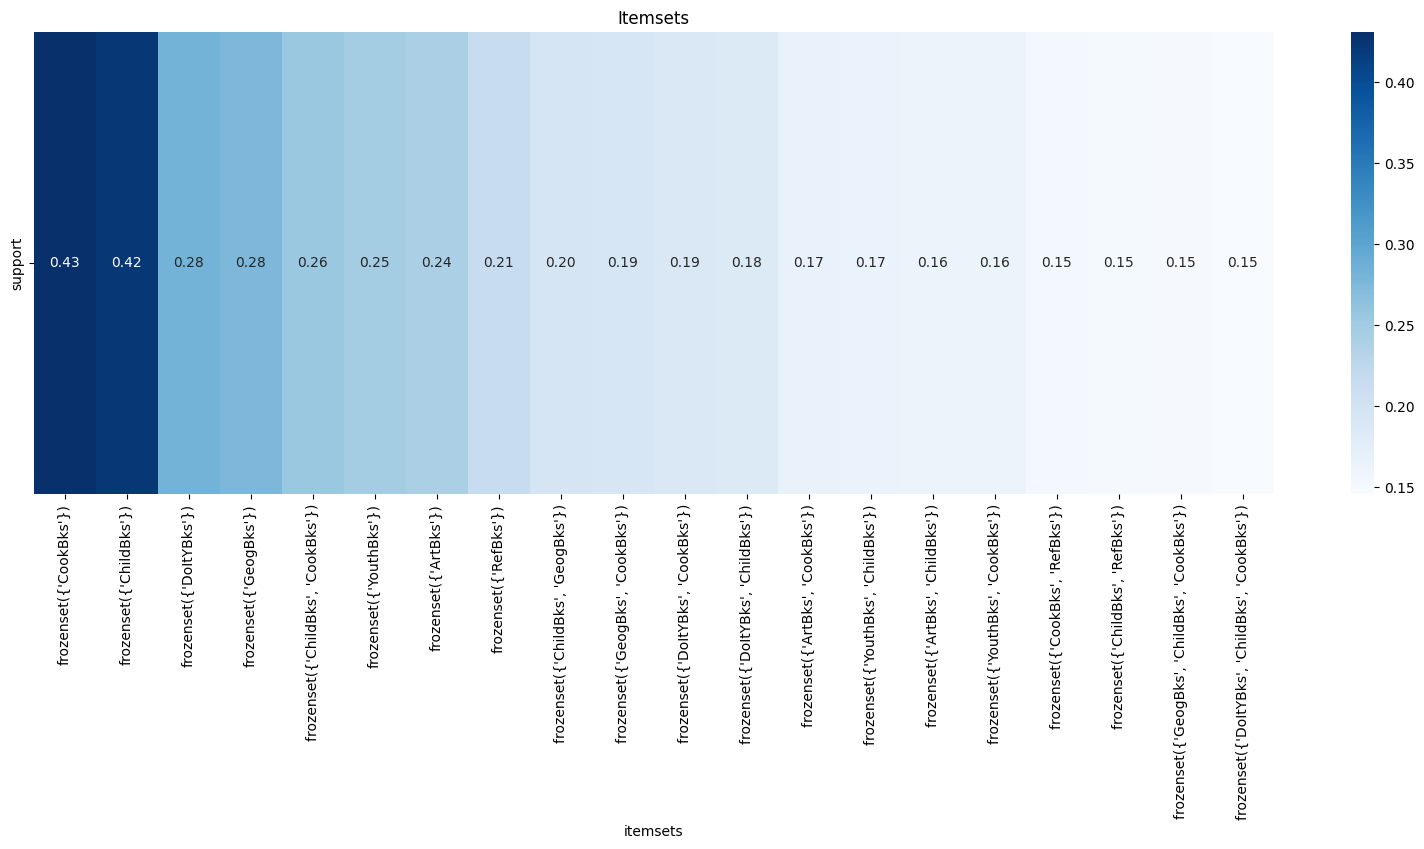

In [14]:
plt.figure(figsize=(20,6))
sns.heatmap(itemsets_df, cmap='Blues', annot=True, fmt='.2f')
plt.title('Itemsets')

### Network graph

In [ ]:
#import networkx as nx


#G = nx.DiGraph()
#for i, row in rules.iterrows():
    #G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

#pos = nx.spring_layout(G, k=0.3, iterations=50)
#nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
#nx.draw_networkx_edges(G, pos, width=rules['lift']*4)
#nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
#plt.axis('off')

### Bar chart

In [ ]:
#rules['lift_new'] = pd.cut(rules['lift'],bins=[1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4],labels=[1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3])
#rules_df = rules.sort_values('lift', ascending=False)

#plt.figure(figsize=(10,6))
#sns.barplot(data=rules_df, y='consequents', x='support', hue='lift_new', dodge=False)
#plt.xticks(rotation=90)
#plt.title('Association Rules')